### This notebook explains how Machine Learning can be applied to predict the species of Iris.
This is a very famous dataset in the world of machine learning and a base for new ML enthusiasts to start off with.
We will be using the scikit-learn library, use KNN (K-Nearest-Neighbor) class and Logistic Regression class from the library to perform ML over the Iris dataset
### Purpose: 
- to explain how the algorithm functions and predicts the species of Iris.
- to explain the steps involved in the process.
- how to successfullly train and test the dataset.

<img src="iris_species.png">

### Terminologies to keep in mind:
- Rows: Observations, sample, example, instance and records
- Columns: Features, , Predictors, attributes, indespendent variable, covariate, iput regressor.
- Target: Response, outcome, label, dependent variable.

In [69]:
#viewing the dataset
from IPython.display import IFrame
IFrame('https://grape.ics.uci.edu/wiki/asterix/attachment/wiki/stats170ab-2018/iris.csv', width=300, height=200)

### Key points to remember:
- Scikit-Learm expects features and response be stored as seperate objects.
- Must be a numpy array(for fast computation) and the data must be numeric.
- Response object should always be numeric
- Featres should be a 2D array with Rows and columns
- The response should be 1D with the count = to the count of Features.


In [70]:
#importing the load_iris function sklearn module
from sklearn.datasets import load_iris

In [71]:
#saving the return object
iris = load_iris()


Scikit-Learn has a speical container object to store its datasets and attributes called Bunch it is very similar to a data sictionary

In [72]:
type(iris)

sklearn.utils.Bunch

In [73]:
# column headers for the data
print(iris.feature_names)
#This is the actual dataset 
#col1 = sepal length, col2 = sepal width, col3 =  petal length, col4 = petal width
print(iris.data)
#.data and .feature_name are a few attributes of iris bunch.

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3

In [74]:
#target represents what we are going to predict 0 = Setosa, 1 = Versicolor, 2 = virginica
print(iris.target)
print(iris.target_names)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']


In [75]:
#storing features
# X & y are naming convention used to store the feature and response
#storing feature matrix in X
X = iris.data   
#storing response vector in y
y = iris.target
# both of them are already stored as nd arrays.

In [76]:
# checking the shape of both the objects
print(X.shape)
print(y.shape)

(150, 4)
(150,)


### Step 1 load the KNN module from skleaarn

In [77]:
#Step1
# lets start using scikitlearn
#import the class you plan to use.
from sklearn.neighbors import KNeighborsClassifier

### Step2
- lets 'intatiate' the 'estimater'
- this is to tell the algorithm to look for the one nearet neighbor known as hyperparamenter.
- all other parameters are default
- its is waiting for the data at this point

In [78]:

knn = KNeighborsClassifier(n_neighbors=1)


In [79]:
print(knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')


### Step 3
- Fit the model with data this is a training step whre the model learns the relationship between X & y
- Occurs in-place

In [80]:
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

### Step 4:
- Lets predict a response for new observation 
- new observations are also called as out-of-sample data
- the model uses information from its training to predict the output

In [81]:
knn.predict([[ 3,5,4,2 ]])

array([2])

returns a numpy array above the answer is 2 - versicolor <br>
can be used to predict multiple observations at once

In [82]:
#predicting multiple observations.
#create a list of observations.
new_obs = [[3,5,4,2], [5,4,3,2]]
knn.predict(new_obs)

array([2, 1])

### Tune the model by changing the k value from 1 to 5 (model tuning)
- varying the argument that is passed to the model

In [83]:
# instantiate the model (using the value K=5)
knn = KNeighborsClassifier(n_neighbors= 5)

# fit the model with data
knn.fit(X, y)

# predict the response for new observations
knn.predict(new_obs)

array([1, 1])

### Lets use a Logistic regression model for classification using the 4 steps discussed above.

In [85]:
#1 import the module
from sklearn.linear_model import LogisticRegression
#2. Instantiate
lr = LogisticRegression()
#3 Fit the model
lr.fit(X,y)
#4 predict for out-of-sample data
lr.predict(new_obs)
lr_pred = lr.predict(new_obs)
print(len(lr_pred))

### there is no definite way to prove which model is more accurate/correct because we are using an out-of-sample and we dont know its correct response values

In [86]:
lr_pred = lr.predict(X)# using the model to test the predictin on the entitre dataset
print(len(lr_pred))# it made one prediction for each observation

150


## Accuracy of LR

In [89]:
# we need a numerical way to measure the accuracy known as evaluation metrics.
#computinig classification accuracy for LR.
#use the metric module
from sklearn import metrics
print (metrics.accuracy_score(y,lr_pred))

0.96


This is called training accuracy

## Accuracy for KNN = 5

In [95]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X,y)
knn_5_pred = knn.predict(X)
print (metrics.accuracy_score(y,knn_5_pred))

0.9666666666666667


## Accuracy for KNN = 1

In [94]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X,y)
knn_1_pred = knn.predict(X)
print (metrics.accuracy_score(y,knn_1_pred))

1.0


- This may not be the best model inspite of 100% accuracy. 

At this point you will be thinking training and testing the data on the same dataset is not a ueful procedure in deciding what model to choose, which is correct.
- The goal is to measure accracy of the model while working with out-of-sample data meaning the future observations whose true response value in unknown.
- if we maximize the training accracy then we are rewarding overlly complex models that wont generailze to future accuracy. meaning models with high training accuracy may not do well whle making predictioon on out-of-sample data.
Creating unecessaryly complex data is called overfitting. 
- models that overfit have learned the noise of the data rather than the signal of the data.
- Low value of K in KNN creats a high-level complexity model that learns the noise of the data.Therefore althought the accuracy may seem high while training and testing on its own dataset, while predicting the response for out-of-sample data the the accuracy may not be as good.


In [101]:
#usiung the SKLs bultin train_test_split function.
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4, random_state=4)

The dataset will be splitted into a training set and a testing set. The training set will train the model and the test set will be used as a out-of-sample data to accurately measure the accuracy of the model.
- how is the dataset split. test_size=0.4 means 40% to the testing set and other 60% for trainig. generally people choose the value between 20 and 40 percent of the data from testing.
- the process of selecting the observations is random, although if a random state is passed as a parameter it will choose the same random data everytime the model is tested.

In [107]:
print (X_train.shape)
print(X_test.shape)

(90, 4)
(60, 4)


As seen above the dataset has been divided in to 90 obs for **Training** and 60 obs for **Testing** out of 150 total observations<br>
so is the rsponse below is split accordingly.

In [109]:
print(y_train.shape)
print(y_test.shape)

(90,)
(60,)


Chcecking the accrauacy of the model.

In [111]:
#loading the model into an object
lorg = LogisticRegression()
#fitting the data X-train and y_train
lorg.fit(X_train,y_train)
#predictiong the response by passing the X_test
y_pred = lorg.predict(X_test)

#measuring the accuracy of the model usiby comparing the actual response value y_test to y_pred
print(metrics.accuracy_score(y_test,y_pred))

0.95


In [117]:
# let us see for which KNN number will the model be more accurate
scores = []
k_range = range(1,26)
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test,y_pred))

Let us plot the accuracy on a graph.

Text(0,0.5,'Testing Accuracy')

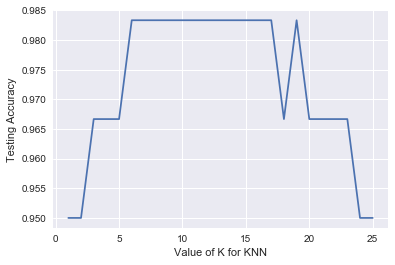

In [132]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(k_range,scores)
plt.xlabel("Value of K for KNN")
plt.ylabel("Testing Accuracy")


As seen in the graph above the the value of K that has good accuracy ranges from 6 to 17 and 19 in KNN. Therefore from the graph above we can use any number of K in that range. 

In [134]:
#using one of the value from the graph above test the model in KNN.
#1 instantiating the estimator
knn = KNeighborsClassifier(n_neighbors = 12)
#2 fit the data
knn.fit(X,y)
knn.predict([[3,5,4,2]])

array([1])